### Analysing the Stroop Effect

In this project, we'll take a look at the Stroop Effect and analyze the sample data provided.  Using descriptive 
statistics, we'll break down some key dataset attributes to get a better idea and picture of the data we're working with.  Once we have a better understanding of the data, we can then formalize an hypothesis and use the appropriate statistical tests to either confirm or disprove our hypothesis. 

(1) What is the independent variable? What is the dependent variable?

With regards to the Stroop Effect experiment, the congruent variable is the independent variable, or congruency of the color and text. While the dependent variable is the incongruent varible, where we'll measure the difference or duration in time to recognize the correct colors or texts. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

Null and Alternative(alt) Hypotheses: 

Null Hypothesis:
**$H_{null}$:       $congruent_{time}$ < $incongruent_{time}$**
  
  The time associated with correctly identifying the congruent variable will be less than the time it takes to 
  correctly identify the incongruent variable.

Alternative Hypothesis:
**$H_{alt}$:        $congruent_{time}$ > $incongruent_{time}$**

  The time associated with correctly indentifying the incongruent variable will be less than the time it takes to 
  correctly indentify the congruent variable.

Hypothesis testing is a common practice used to determine whether a proposition (Null Hypothesis) can be rejected based on sample data. Here, we'll use the bootstrapping method to conduct a statistical test to define time as a representation of the population mean. I chose the bootstrapping method because we currently have a sample of data and not a population. One of the advantages to using the bootstrapping method is that we can resample, with replacement, the sample data at hand to create a larger number of ghost samples to further examine the distribution of the original dataset compared to that of the sample sets created. 

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [4]:
# my imports to conduct data analysis and manipulations

import pandas as pd
from pandas import Series,DataFrame

import numpy as np

# my imports for visualizations

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline


In [5]:
# LOADING MY DATA:

# I'll set up a data frame using the stroop.csv file.  First, I'll create a variable for the file path of 
# the stroop csv file, then pass it to the .read_csv method in Pandas.

stroop_fp = '/Volumes/LACIE SETUP/Data_Science/Udacity_DataAnalyst_NanoDegree_Projects/' \
             'Test_Perceptual_Phenomenon/stroopdata.csv'


In [6]:
# Initializing my data frame using the .read_csv method in Pandas

strp_data_df = pd.read_csv(stroop_fp)

In [7]:
# checking my dataframe
strp_data_df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [8]:
# getting a little info on the dataset at a high level, # of rows, columns, any missing data, etc.
strp_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


Now let's use some descriptive statistics, like measures of central tendency and dispersion, to better understand our
dataset and it's properties.  This will help me choose the appropriate technique or techniques for analzying the 
stroop dataset. 

### Measures of Central Tendency

The mean, median and mode are measures of central tendency and describe the location of the data. Let's calculate them.

In [9]:
# calculating the mean of the dataset for each element/variable
strp_data_df.mean()

Congruent      14.051125
Incongruent    22.015917
dtype: float64

Here, we've calculated the mean for the **_congruent_** variable as well as the **_incongruent_** variable. The mean is just an average value of the entire dataset for a particular variable.  In this case, the `.mean` function adds up all the values for a particular element, then divides by the number of elements to get the mean.

In [10]:
# calculating the median of the dataset for each element/variable
strp_data_df.sort_values(['Congruent'], ascending=True)

,Congruent,Incongruent
3,8.630,15.687
7,8.987,17.394
8,9.401,20.762
2,9.564,21.214
17,10.639,20.429
18,11.344,17.425
0,12.079,19.278
15,12.130,22.158
5,12.238,20.878
19,12.369,34.288


In [11]:
# Now that the congruent variable is sorted in ascending order, I can calculate the median

median_value = (14.233 + 14.80) / 2

print("The median value of the congruent variable within this dataset is:", median_value)

The median value of the congruent variable within this dataset is: 14.5165


The median value of the congruent variable is 14.5165. The median of a dataset is its midpoint. In order to get this, I had to first sort the congruent column in ascending order. Once I've done that, and knowing the number of elements in the dataset, 24, I can sum the values of the 12th and 13th largest values, its midpoint, then divide by 2 to get the median. 

In [12]:
# calculating the mode of the Incongruent variable

strp_data_df.sort_values(['Incongruent'], ascending=True)

,Congruent,Incongruent
3,8.630,15.687
7,8.987,17.394
18,11.344,17.425
12,15.073,17.510
21,14.233,17.960
11,15.298,18.644
1,16.791,18.741
0,12.079,19.278
13,16.929,20.330
17,10.639,20.429


The mode of a dataset is simply the most commonly observed value. After sorting the Incongruent column in ascending 
order, a quick glance (only 24 rows) has revealed there is no mode, or repeating value for this variable. I could also
run the code `strp_data_df['Incongruent'].value_counts()` to get the mode as well. This will produce a count of how 
many times a value appears in the dataset.

### Measures of Dispersion

Range, variance and standard deviation are 3 commonly used measures of dispersion. They show how spread out the elements of a sample or population are. Let's calculate them for our dataset.

In [13]:
# calculating the range of the dataset for each element

Congruent_Range = strp_data_df['Congruent'].max() - strp_data_df['Congruent'].min()

print("Congruent Range:", Congruent_Range)

Incongruent_Range = strp_data_df['Incongruent'].max() - strp_data_df['Incongruent'].min()

print("Incongruent Range:", Incongruent_Range)

Congruent Range: 13.698000000000002
Incongruent Range: 19.568


The range of a dataset is the difference between its largest and smallest values for each element.  Here, we just calculated each range by using the min/max function and assigning it to a variable.

In [16]:
# calculating the variance using Numpy's built-in var function - first let's get the congruent column values put 
# into an array so Numpy can work with it

cong_lst = np.array(strp_data_df['Congruent'])

incon_lst = np.array(strp_data_df['Incongruent'])

In [19]:
# Using Numpy's random.choice built-in function to simulate a sample size of 10,000 with replacement for both 
# variables

cong_smp = np.random.choice(cong_lst, size=(10000, 24))

incon_smp = np.random.choice(incon_lst, size=(10000, 24))

print("The variance for congruent sample set is:", np.var(cong_smp))

print("The variance for the incongruent sample set is:", np.var(incon_smp))

The variance for congruent sample set is: 12.103184760183241
The variance for the incongruent sample set is: 22.037065909293535


In [20]:
# Calculating the Standard Deviation(std)

print("Congruent Standard Deviation:", np.std(cong_smp))

print("Incongruent Standard Deviation:", np.std(incon_smp))

Congruent Standard Deviation: 3.478963173157089
Incongruent Standard Deviation: 4.694365336154988


Standard deviation is just the square root of the variance. This ensures that the deviation of a dataset is measured
in the same units as the dataset.  That being said, this one was easy to calculate by using Numpy's built-in function
`.std`. Here the standard deviation for the **_congruent_** variable is 3.4790, while the standard deviation for the 
**_incongruent_** variable is 4.6944. 

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

Text(0.5,0,'Time in Seconds')

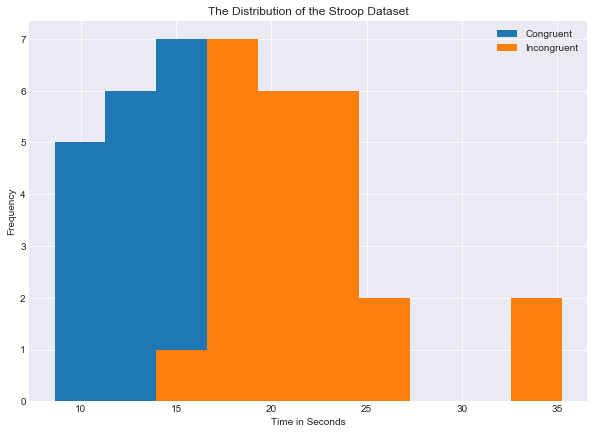

In [26]:
# Plotting a histogram of the stroop data dataframe

strp_data_df.plot(kind='hist', figsize=(10,7))

# setting my labels
plt.title('The Distribution of the Stroop Dataset')
plt.xlabel('Time in Seconds')

This might seem a bit confusing at first, but if we take a minute and look closely, we can see the distribution of 
time between the **_congruent_** variable and the **_incongruent_** variable; this is conveyed by the shaded areas 
of the graph. Like the data shows, this graph also depicts the congruent variable needing less time to provide the 
correct answer (shaded area blue), versus the incongruent variable whose shaded area (orange) encompasses the 
lengthier second values.

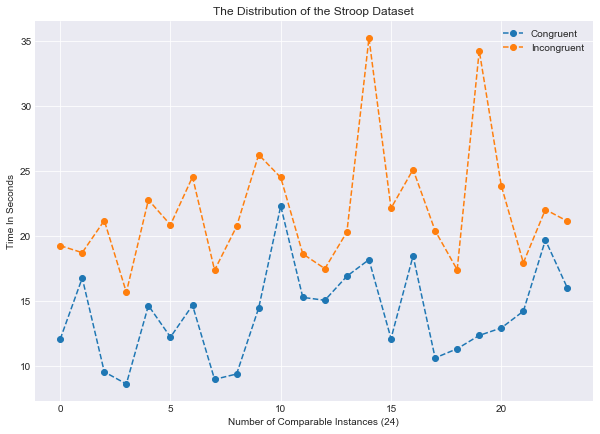

In [33]:
# Creating a matplotlib.axes.AxesSubplot object
strp_data_fig, ax = plt.subplots(figsize=(10,7))

# Setting the labels on my matplotlib object
ax.set_xlabel('Number of Comparable Instances (24)')
ax.set_ylabel('Time In Seconds')

strp_data_df[['Congruent', 'Incongruent']].plot(kind='line',ax=ax, title="The Distribution of the Stroop Dataset", 
                                                legend=True, style='--', marker='o');

Ahhh. This is a bit more clear to understand.  Here we can see that for every instance of the congruent variable being
indentified correctly(denoted by the dot) it took longer to identify the incongruent variable. 

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [39]:
# creating a 'congruent group' data frame from the congruent column. We'll make a df from the incongruent 
# group as well

congruent_df = strp_data_df['Congruent']

incongruent_df = strp_data_df['Incongruent']

In [44]:
# confirming the shape of my congruent df

print("The congruent dataframe shape is:", congruent_df.shape)

print("The incongruent dataframe shape is:", incongruent_df.shape)

The congruent dataframe shape is: (24,)
The incongruent dataframe shape is: (24,)


In [48]:
# creating mean variables both congruent and incongruent elements
congruent_mean = congruent_df.mean()
incongruent_mean = incongruent_df.mean()

# computing the observed difference (incongruent value - congruent value) in time, seconds.
obs_diff = incongruent_mean - congruent_mean

print("The observed difference between incongruent and congruent variables in seconds is:", obs_diff)

The observed difference between incongruent and congruent variables in seconds is: 7.964791666666665


In [49]:
diffs = []
size = strp_data_df.shape[0]

for i in range(10000):
    b_samp = strp_data_df.sample(size, replace=True)
    congruent_mean = b_samp['Congruent'].mean()
    incongruent_mean = b_samp['Incongruent'].mean()
    diffs.append(incongruent_mean - congruent_mean)

In [50]:
diffs = np.array(diffs)

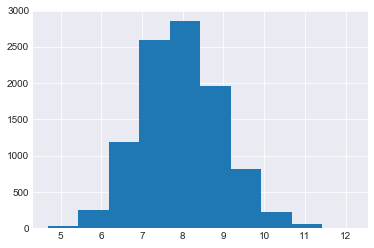

In [51]:
plt.hist(diffs);

In [52]:
null_vals = np.random.normal(0, diffs.std(), diffs.size)

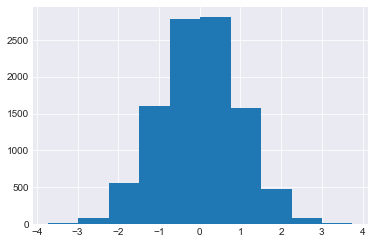

In [53]:
plt.hist(null_vals);

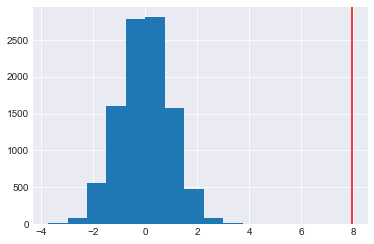

In [54]:
# plotting the observed statistic

plt.hist(null_vals);
plt.axvline(x=obs_diff, color='r');

Our statistic definitely doesn't look like it came from our Null distribution. Looks like the difference we observe is significant.

In [55]:
# finding the p-value
(null_vals > obs_diff).mean()

0.0

With a p-value of less than 0.01 or 1%, it seems unlikely that our statistic is from the Null.

### Results

The confidence level or Type I error associated with this test actually came out to be zero. From a glance both at the dataframe and the visualizations, the congruent variables (recorded times in seconds) were smaller than the incongruent variables. The statistical test run supports my original hypothesis, and based on the relationship between the test statistic and the critical value, being that the test statistic/observed diff is considered to be significant, we must fail to reject the Null Hypothesis. 

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--

### Resources

- Complete Python Masterclass with Tim Buchalka, Jean-Paul Roberts (Udemy)
- Learning Python for Data Analysis and Visualization with Jose Portilla (Udemy)
- Python Crash Course with Eric Matthes
- Udacity Lessons
- Google/Stack Overflow
- Udacity Slack Platform